# Simulation 1.1 - Analyzing the agents


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent as agn

## Defining the parameters of the simulations

In [18]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

exploration_train = 0.1
exploration_test = 0
learningrate = 0.1
discount = 0.9
max_steps = 1000

flag_reward = 10
query_reward = -1

## Loading the statistics

In [19]:
train_data = joblib.load('ignore_simul1_traindata_20210225215819702347.pkl')
test_data = joblib.load('ignore_simul1_testdata_20210225215819702347.pkl')

#train_data = joblib.load('ignore_simul1_1traindata_20210226183427427987.pkl')
#test_data = joblib.load('ignore_simul1_1testdata_20210226183427427987.pkl')

## Analyzing the agent

Text(0, 0.5, 'number of states')

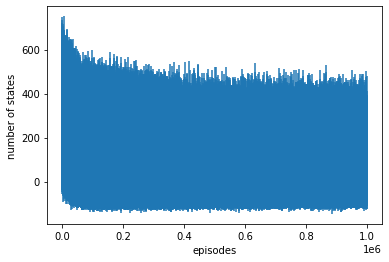

In [20]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,0,:],axis=0),yerr=np.std(train_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')

4.795 5.0


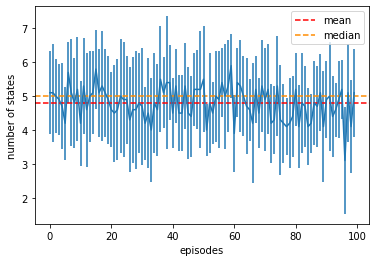

In [44]:
plt.errorbar(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0),yerr=np.std(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.axhline(np.median(test_data[:,0,:]),c='darkorange',ls='--',label='median')
print(np.mean(test_data[:,0,:]), np.median(test_data[:,0,:]))
plt.legend()

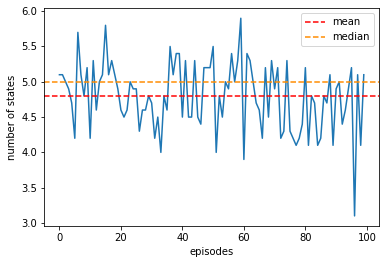

In [42]:
plt.plot(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.axhline(np.median(test_data[:,0,:]),c='darkorange',ls='--',label='median')
plt.legend()

In [51]:
num_steps = test_data[:,0,:].flatten()
conf = 1.96 * np.std(num_steps) / np.sqrt(len(num_steps))
mean = np.mean(num_steps)
print(mean, conf)
print(np.round([mean-conf, mean+conf],3))

4.795 0.08692716008245065
[4.708 4.882]


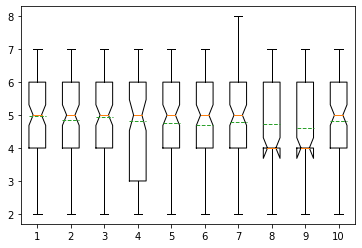

In [56]:
plt.boxplot(test_data[:,0,:].T, notch = True, showmeans = True, meanline = True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f61d016dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f61d02a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f61d016a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f61d02ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f61d034220>],
 'means': [<matplotlib.lines.Line2D at 0x1f61d02aeb0>]}

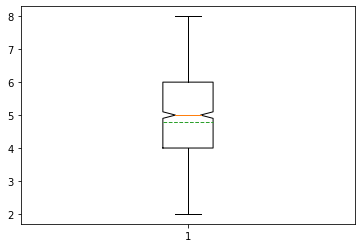

In [55]:
plt.boxplot(test_data[:,0,:].flatten(), notch = True, showmeans = True, meanline= True)

In [26]:
steps = 10 - test_data[:,1,:]

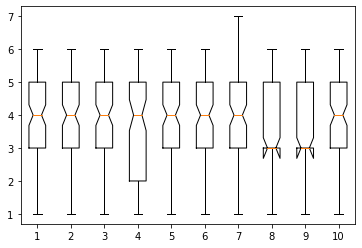

In [27]:
plt.boxplot(steps.T, notch = True)
plt.show()